In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


df = pd.read_excel("ts_medical_data_recleaned-14C.xlsx",index_col=0)
df



,year,month,Identificacion,1.Proteinuria1.g/L,2.Microalbuminuria1,3.HbA1C.1,4.Creatinuria.1,5.Creatinina.1,6.Glucemia1,7.Edad,...,39.Proteinuria2,40.Proteinuria3,41.FECHA.Proteinuria3,42.Microalbuminuria2,43.FECHA.Microalbuminuria2,44.Microalbuminuria3,44.FECHA.Microalbuminuria3,45.ParcialOrina,46.Corrected.TFG,47.Estadofinal
0,2013,2,562970,0.100,NaN,NaN,NaN,0.90,NaN,88.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,55.56,NaN
1,2013,10,562970,0.039,NaN,NaN,NaN,1.11,NaN,89.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,45.05,NaN
2,2014,12,562970,0.053,NaN,NaN,NaN,1.03,NaN,90.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,48.54,NaN
3,2015,12,562970,0.240,NaN,NaN,NaN,1.20,NaN,91.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,41.47,NaN
4,2017,3,562970,0.048,20.0,5.9,1320.0,1.19,82.0,92.0,...,23.0,19.0,2017-04-20,10.0,2016-11-25,10.0,2017-04-20,INACTIVO,42.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,2017,1,22096224,0.200,NaN,NaN,1987.0,0.93,115.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,46.26,vivo
4488,2017,4,22096224,0.250,2000.0,6.4,1765.0,1.05,130.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,40.30,vivo
4489,2017,7,22096224,NaN,1600.0,7.0,990.0,1.46,138.0,78.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,17.19,Fallecido
4490,2015,4,21599285,NaN,58.0,7.6,1900.0,0.89,127.0,87.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,18.89,vivo


In [2]:
# Getting the dates as an intepretable column

import matplotlib.dates as mdates
month = pd.to_datetime(df['month'], format='%m').astype(str).str.split('-', expand=True)[1] # Month format
years_fmt = mdates.DateFormatter('%Y-%m')

date=df['year'].astype(str)+ month.astype(str)

Date = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year'].astype(str), month.astype(str))])

df['Date']=Date

df['Date']


0      2013-02-01
1      2013-10-01
2      2014-12-01
3      2015-12-01
4      2017-03-01
          ...    
4487   2017-01-01
4488   2017-04-01
4489   2017-07-01
4490   2015-04-01
4491   2013-12-01
Name: Date, Length: 4492, dtype: datetime64[ns]

In [3]:
df.columns

Index(['year', 'month', 'Identificacion', '1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '8.Sexo', '9.Nivel.ingresos',
       '10.Nivel.ingresos', '11.Estado.civil', '12.Tipo.afiliacion.SGSSS',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '18.EstadioRenal1', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria', '32.EPS',
       '33.IPS', '34.TipoID', '35.Fecha.ultimavalidacion',
       '36.creatinina3.mgdl', '37.TFG.calculada', '38.EstadioRenal2.calculado',
       '39.Proteinuria2', '40.Proteinuria3', '41.FECHA.Proteinuria3',
       '42.Microalbuminuria2', '43.FECHA.Microalbuminuria2',
  

# Some data treatment 

In [4]:
#FIRST REMOVE DUPLICATES and take the lowest tfg if the measure is in the same month

nodup = df.sort_values('46.Corrected.TFG',ascending=False).drop_duplicates(subset=['Date','Identificacion'], keep='last')

# SECOND Where most of the data is located
start_date = '2016-04-15'
end_date = '2016-12-15'

nodupsq=nodup[(nodup['Date'] > start_date) & (nodup['Date'] <= end_date)]
Oridf=df.copy()

# Simple Random forest model of Corrected.TFG

In [5]:
# Now a random forest desicion tree to predict 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       '46.Corrected.TFG']################### Acá está el orden de las features

df=df[important_base_columns]

df = df[df['46.Corrected.TFG'].notna()]# Eliminating the ones that we dont have info of the prediction
features = pd.get_dummies(df)# Dummify the ones that can be dummified (Categoricals)


labels = np.array(features['46.Corrected.TFG'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('46.Corrected.TFG', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (2960, 33)
Training Labels Shape: (2960,)
Testing Features Shape: (987, 33)
Testing Labels Shape: (987,)


In [6]:
# Baseline errors, and display average baseline error
baseline_errors = abs(test_labels -df['46.Corrected.TFG'].mean())
print('Average baseline error: ', round(np.nanmean(baseline_errors), 2))


Average baseline error:  21.85


In [7]:
# Random forest training

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


In [8]:
# Error of the easiest random forest model

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg')

Mean Absolute Error: 4.61 calculated tfg


In [9]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.26 %.


Text(0.5, 0, 'Random Forest Feature Importance')

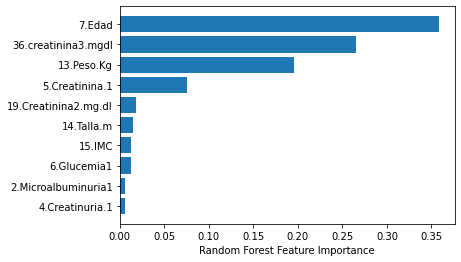

In [10]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# Feature importance with SHAP
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)


In [ ]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

In [ ]:
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')
# The dot file is converted to tree png online
#from graphviz import render
#render('dot', 'png', 'tree.dot')
#import pydot
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

# Time series Features

In [11]:
df = Oridf.copy()

In [12]:
ndf=df.set_index([df['Identificacion'].rename('Id'),df['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
ndf['tfg_before']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

In [13]:
df['Identificacion']

0         562970
1         562970
2         562970
3         562970
4         562970
          ...   
4487    22096224
4488    22096224
4489    22096224
4490    21599285
4491    21801917
Name: Identificacion, Length: 4492, dtype: int64

In [14]:
ndf=df.set_index([df['Identificacion'].rename('Id'),df['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
# The new feature of the last measure by id and date
ndf['tfg_before']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

In [15]:
# The new feature of the change of the last measure
ndf['tfg_change']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(2)

In [16]:
y=ndf.groupby(level=0)['year'].shift(1)*12-ndf.groupby(level=0)['year'].shift(2)*12
m=ndf.groupby(level=0)['month'].shift(1)-ndf.groupby(level=0)['month'].shift(2)

ndf['tfgD_per_month_before']=ndf['tfg_change']/(y+m)

y1=(ndf.groupby(level=0)['year'].shift(0)-ndf.groupby(level=0)['year'].shift(1))*12
m1=ndf.groupby(level=0)['month'].shift(0)-ndf.groupby(level=0)['month'].shift(1)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

ndf['tfgC_per_month_now']=k1/(y1+m1)

In [17]:
ndf

year  month  Identificacion  1.Proteinuria1.g/L  \
Id       date                                                          
562970   2013-02-01  2013      2          562970               0.100   
         2013-10-01  2013     10          562970               0.039   
         2014-12-01  2014     12          562970               0.053   
         2015-12-01  2015     12          562970               0.240   
         2017-03-01  2017      3          562970               0.048   
...                   ...    ...             ...                 ...   
22096224 2017-01-01  2017      1        22096224               0.200   
         2017-04-01  2017      4        22096224               0.250   
         2017-07-01  2017      7        22096224                 NaN   
21599285 2015-04-01  2015      4        21599285                 NaN   
21801917 2013-12-01  2013     12        21801917                 NaN   

                     2.Microalbuminuria1  3.HbA1C.1  4.Creatinuria.1  \
Id       date                                                          
562970   2013-02-01                  NaN        NaN              NaN   
         2013-10-01                  NaN        NaN              NaN   
         2014-12-01                  NaN        NaN              NaN   
         2015-12-01                  NaN        NaN              NaN   
         2017-03-01                 20.0        5.9           1320.0   
...                                  ...        ...              ...   
22096224 2017-01-01                  NaN        NaN           1987.0   
         2017-04-01               2000.0        6.4           1765.0   
         2017-07-01               1600.0        7.0            990.0   
21599285 2015-04-01                 58.0        7.6           1900.0   
21801917 2013-12-01                 46.0        5.9              NaN   

                     5.Creatinina.1  6.Glucemia1  7.Edad  ...  \
Id       date                                             ...   
562970   2013-02-01            0.90          NaN    88.0  ...   
         2013-10-01            1.11          NaN    89.0  ...   
         2014-12-01            1.03          NaN    90.0  ...   
         2015-12-01            1.20          NaN    91.0  ...   
         2017-03-01            1.19         82.0    92.0  ...   
...                             ...          ...     ...  ...   
22096224 2017-01-01            0.93        115.0    77.0  ...   
         2017-04-01            1.05        130.0    77.0  ...   
         2017-07-01            1.46        138.0    78.0  ...   
21599285 2015-04-01            0.89        127.0    87.0  ...   
21801917 2013-12-01            1.10         78.0    54.0  ...   

                    44.Microalbuminuria3  44.FECHA.Microalbuminuria3  \
Id       date                                                          
562970   2013-02-01                  NaN                         NaT   
         2013-10-01                  NaN                         NaT   
         2014-12-01                  NaN                         NaT   
         2015-12-01                  NaN                         NaT   
         2017-03-01                 10.0                  2017-04-20   
...                                  ...                         ...   
22096224 2017-01-01                  NaN                         NaT   
         2017-04-01                  NaN                         NaT   
         2017-07-01                  NaN                         NaT   
21599285 2015-04-01                  NaN                         NaT   
21801917 2013-12-01                  NaN                         NaT   

                    45.ParcialOrina 46.Corrected.TFG 47.Estadofinal  \
Id       date                                                         
562970   2013-02-01             NaN            55.56            NaN   
         2013-10-01             NaN            45.05            NaN   
         2014-12-01             NaN            48.54            NaN   
         

# Heatmap visualization again

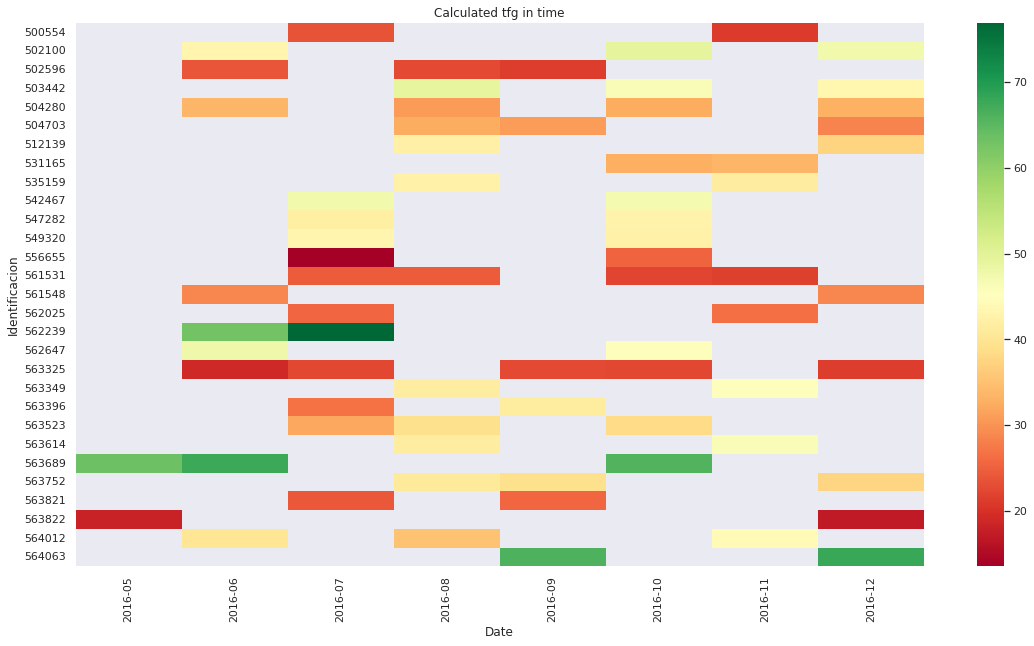

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
nodupsq
fig, ax = plt.subplots(figsize=(19,10))  # Sample figsize in inches

n=30
minimum_missin_vals=6
nodup = ndf.sort_values('46.Corrected.TFG',ascending=False).drop_duplicates(subset=['Date','Identificacion'], keep='last')

# SECOND Where most of the data is located
start_date = '2016-04-15'
end_date = '2016-12-15'

nodupsq=nodup[(nodup['Date'] > start_date) & (nodup['Date'] <= end_date)]
pivot=nodupsq.pivot(index='Identificacion', columns='Date', values='46.Corrected.TFG')
piv=pivot[pivot.isnull().sum(axis=1)<=minimum_missin_vals][1:n] # Selecting only the 25 Identifications that have 4 or less data misisng
ax = sns.heatmap(piv, ax=ax,cmap='RdYlGn')
years_fmt = mdates.DateFormatter('%Y-%m')
#ax.set_xticklabels(nodupsq['Date'].dt.strftime('%Y-%m'))
ax.set_xticklabels(piv.columns.strftime('%Y-%m'), rotation=90)
ax.set_title('Calculated tfg in time')
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good


df = ndf[ndf['46.Corrected.TFG'].notna()]


print("ndf dim",df.shape)
labels = np.array(df['46.Corrected.TFG'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('46.Corrected.TFG', axis = 1)

tr_features, validation_features, tr_labels, validation_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

tr_features['46.Corrected.TFG']=tr_labels

validation_features['46.Corrected.TFG']=validation_labels

print("ndf dim",tr_features.shape)
print("Validation dim",validation_features.shape)

validation_features.to_excel('BasedatosRegVal.xlsx')
tr_features.to_excel('BasedatosRegS.xlsx')


ndf=tr_features.copy(deep=True)




#  NEW model with New features and mean

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_change','tfg_before',
       '46.Corrected.TFG']################### Acá está el orden de las features #

df=ndf[important_base_columns]

df = df[df['46.Corrected.TFG'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['46.Corrected.TFG'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('46.Corrected.TFG', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (2960, 35)
Training Labels Shape: (2960,)
Testing Features Shape: (987, 35)
Testing Labels Shape: (987,)


In [21]:
# Random forest training

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


In [22]:
# Error of the easiest random forest model
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)
test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg')

Mean Absolute Error: 4.71 calculated tfg


Accuracy: 85.68 %.
R2 test:  0.8657039710959649
R2 train:  0.9785245050301681
sMAPE: 8.62 %.
RMSE:  10.24 NRMSE:  0.059


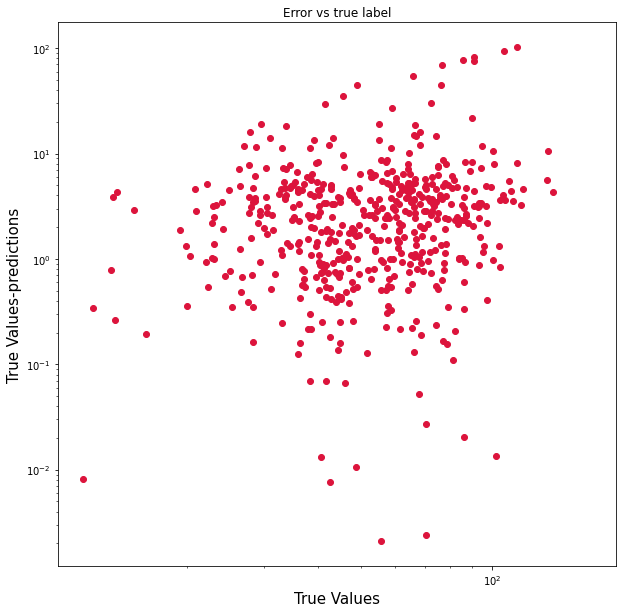

In [26]:
from sklearn.metrics import r2_score
import math
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))

# Calculate and display accuracy
def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

# Plot of the error
plt.figure(figsize=(10,10))
plt.scatter(predictions, predictions-test_labels, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)
plt.title('Error vs true label')

plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

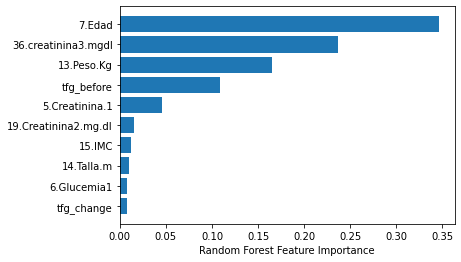

In [27]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

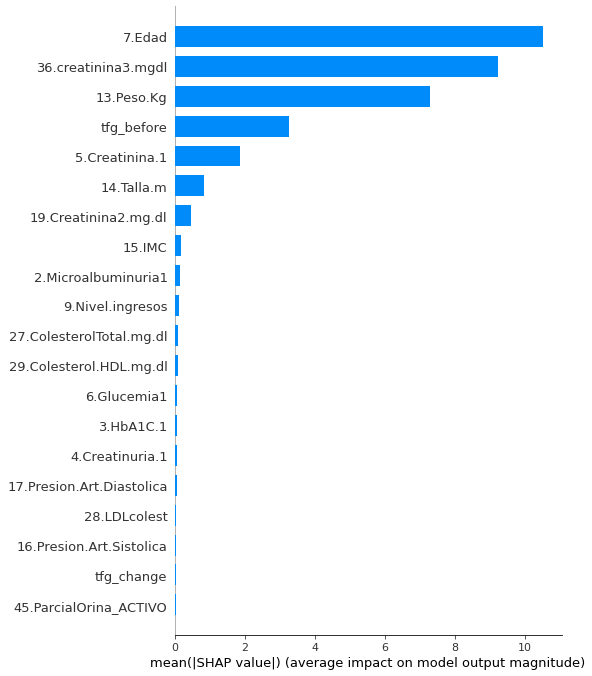

In [28]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

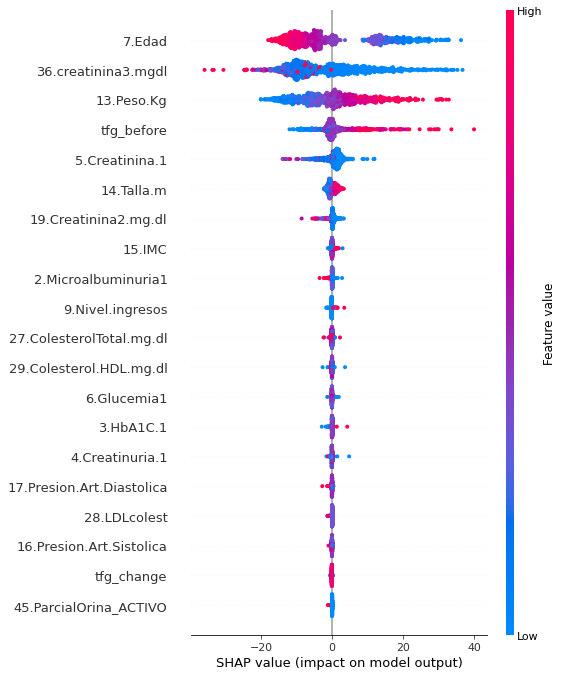

In [29]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# Xgboost of the prediction

In [ ]:
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
        '46.Corrected.TFG']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['46.Corrected.TFG'].notna()]
df = pd.get_dummies(df)
X, y = df.drop(columns=['46.Corrected.TFG']),df['46.Corrected.TFG']
feature_list=list(X.columns)

data_dmatrix = xgb.DMatrix(data=X,label=y,enable_categorical=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
from sklearn.metrics import r2_score

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

errors = abs(preds - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 4), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(y_test, preds), 3), '%.')

rmse = np.sqrt(mean_squared_error(y_test, preds))

NRMSE=rmse/(y_test.max()-y_test.min())

print('RMSE: ',round(rmse,4),'NRMSE: ',round(NRMSE,4))

print ('R2 test: ',r2_score(y_test, preds))

print ('R2 train: ',r2_score(y_train, xg_reg.predict(X_train)))

plt.figure(figsize=(10,10))
plt.scatter(preds, preds-y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)
plt.title('Error vs true label')

plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(data_dmatrix)
shap.summary_plot(shap_values, X)

# score of the validation

In [ ]:
XV, yV = validation_features.drop(columns=['46.Corrected.TFG']),validation_features['46.Corrected.TFG']
preds = xg_reg.predict(XV)

errors = abs(preds - yV)

print('Mean Absolute Error XGboost:', round(np.mean(errors), 4), 'calculated tfg')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:XGboost', round(smape(yV, preds), 3), '%.')

rmse = np.sqrt(mean_squared_error(yV, preds))

NRMSE=rmse/(yV.max()-yV.min())

print('RMSE:XGboost ',round(rmse,4),'NRMSE:XGboost ',round(NRMSE,4))

print ('R2 XGboost: ',r2_score(yV, preds))

### Random forest
Validation_features_imp = imp.transform(XV)

predsRF = rf.predict(Validation_features_imp)

errorsRF = abs(predsRF - yV)

print('Mean Absolute Error RF:', round(np.mean(errors), 4), 'calculated tfg')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:RF', round(smape(yV, predsRF), 3), '%.')

rmse = np.sqrt(mean_squared_error(yV, predsRF))

NRMSE=rmse/(yV.max()-yV.min())

print('RMSE:RF ',round(rmse,4),'NRMSE:RF ',round(NRMSE,4))

print ('R2 RF: ',r2_score(yV, predsRF))




# Predicting the TFGchange/month in the actual measure based on actual values y_t-y_1

In [30]:
#Predicting tfgC_per_month_now
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_now']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_now'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_now'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_now', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Features Shape: (1513, 33)
Training Labels Shape: (1513,)
Testing Features Shape: (505, 33)
Testing Labels Shape: (505,)


In [31]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

Mean Absolute Error: 3.52 calculated tfg change/month
sMAPE: 147.85 %.
RMSE:  12.765 NRMSE:  0.047


Text(0.5, 0, 'Random Forest Feature Importance')

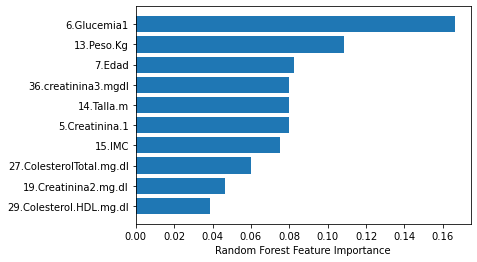

In [32]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

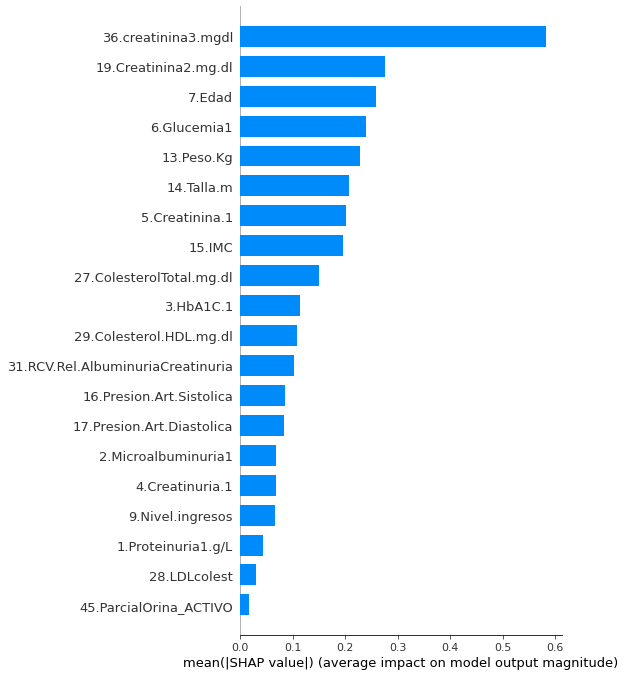

In [33]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

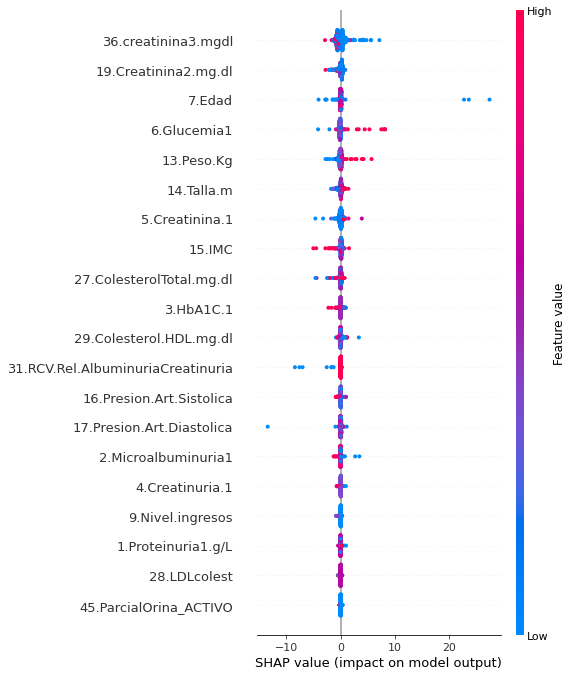

In [34]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)

# Another time series feature

In [36]:
#TIMESERIES:


y1=(ndf.groupby(level=0)['year'].shift(-1)-ndf.groupby(level=0)['year'].shift(0))*12
m1=ndf.groupby(level=0)['month'].shift(-1)-ndf.groupby(level=0)['month'].shift(0)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(-1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)

ndf['tfgC_per_month_next']=k1/(y1+m1)
    

# Splitting the data into validation for subsequent split into train test

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

nudf = pd.read_excel("BasedatosRegDeriv.xlsx")
print("ndf dim",nudf.shape)
labels = np.array(nudf['tfgC_per_month_next'])
# Remove the labels from the features
# axis 1 refers to the columns
features= nudf.drop('tfgC_per_month_next', axis = 1)

tr_features, validation_features, tr_labels, validation_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

tr_features['tfgC_per_month_next']=tr_labels

validation_features['tfgC_per_month_next']=validation_labels

print("ndf dim",tr_features.shape)
print("Validation dim",validation_features.shape)

validation_features.to_excel('BasedatosRegDerivVal.xlsx')
tr_features.to_excel('BasedatosRegDerivS.xlsx')


ndf=tr_features.copy(deep=True)



ndf dim (1412, 36)
ndf dim (1129, 36)
Validation dim (283, 36)


<ipython-input-15-804bda634c15>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_features['tfgC_per_month_next']=tr_labels
<ipython-input-15-804bda634c15>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_features['tfgC_per_month_next']=validation_labels


,Id,date,1.Proteinuria1.g/L,2.Microalbuminuria1,3.HbA1C.1,4.Creatinuria.1,5.Creatinina.1,6.Glucemia1,7.Edad,9.Nivel.ingresos,...,30.Hemoglobina.mg.dl,31.RCV.Rel.AlbuminuriaCreatinuria,36.creatinina3.mgdl,39.Proteinuria2,40.Proteinuria3,42.Microalbuminuria2,44.Microalbuminuria3,45.ParcialOrina_ACTIVO,45.ParcialOrina_INACTIVO,tfgC_per_month_next
629,15251136.0,2016-10-01,0.01,1.0,NaN,5173.0,1.10,103.0,73,1.0,...,NaN,NaN,1.10,NaN,NaN,NaN,NaN,0,0,0.000000
439,8264083.0,2016-09-01,0.01,NaN,NaN,NaN,0.82,NaN,75,1.0,...,NaN,NaN,0.82,NaN,NaN,NaN,NaN,0,0,-0.699015
485,21434712.0,2013-02-01,0.01,35.0,6.9,8668.0,0.76,470.0,73,1.0,...,14.0,NaN,0.78,NaN,NaN,NaN,NaN,1,0,-2.066667
48,21597053.0,2016-05-01,NaN,12.0,5.3,1750.0,1.03,80.0,87,1.0,...,NaN,NaN,1.03,NaN,NaN,NaN,NaN,0,0,-1.152773
155,575137.0,2016-09-01,NaN,3.0,NaN,10365.0,1.23,NaN,83,1.0,...,NaN,NaN,1.23,NaN,NaN,NaN,NaN,0,0,1.104434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,21436687.0,2016-06-01,0.01,38.0,9.3,2399.0,0.67,203.0,65,4.0,...,NaN,NaN,0.67,NaN,NaN,NaN,NaN,0,0,-4.336229
1130,39380114.0,2016-10-01,NaN,NaN,NaN,NaN,0.92,NaN,77,1.0,...,NaN,NaN,0.92,NaN,NaN,NaN,NaN,0,0,1.115067
1294,22022550.0,2016-07-01,NaN,NaN,NaN,NaN,0.79,NaN,91,1.0,...,NaN,NaN,0.79,NaN,NaN,NaN,NaN,0,0,0.209212
860,3425939.0,2016-05-01,NaN,NaN,5.7,NaN,1.24,NaN,81,1.0,...,NaN,NaN,1.24,NaN,NaN,NaN,NaN,0,0,0.268129


# Predicting the change of tfg in the next measure based on actual values y_t+1-y_t

In [37]:
#Predicting tfgC_per_month_now
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']################### Acá está el orden de las features # 'tfgD_per_month_before'

ndf = pd.read_excel("BaseDatosregDeriv.xlsx",index_col=0)

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_next'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_next', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Features Shape: (1513, 33)
Training Labels Shape: (1513,)
Testing Features Shape: (505, 33)
Testing Labels Shape: (505,)


Mean Absolute Error: 3.45 calculated tfg change/month
sMAPE: 151.57 %.
RMSE:  9.801 NRMSE:  0.052
R2 test:  -0.06579859700744639
R2 train:  0.821008185659807


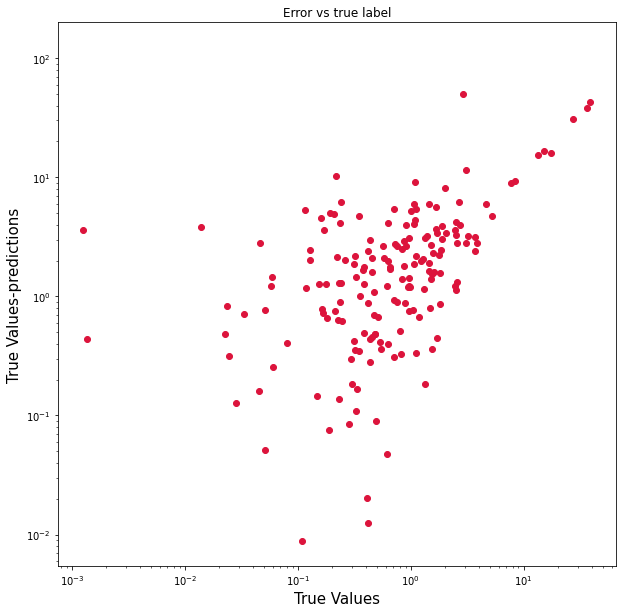

In [38]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))


print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))
plt.figure(figsize=(10,10))
plt.scatter(predictions, predictions-test_labels, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)
plt.title('Error vs true label')

plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

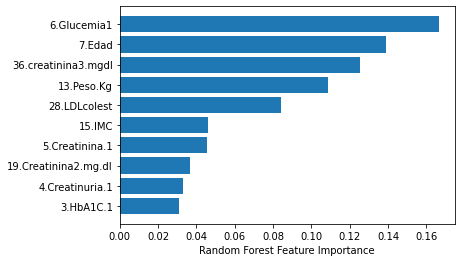

In [39]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

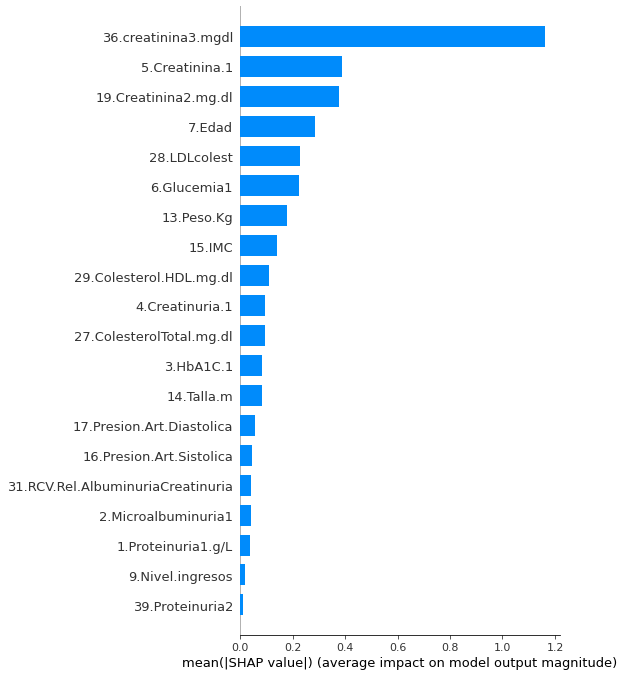

In [40]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

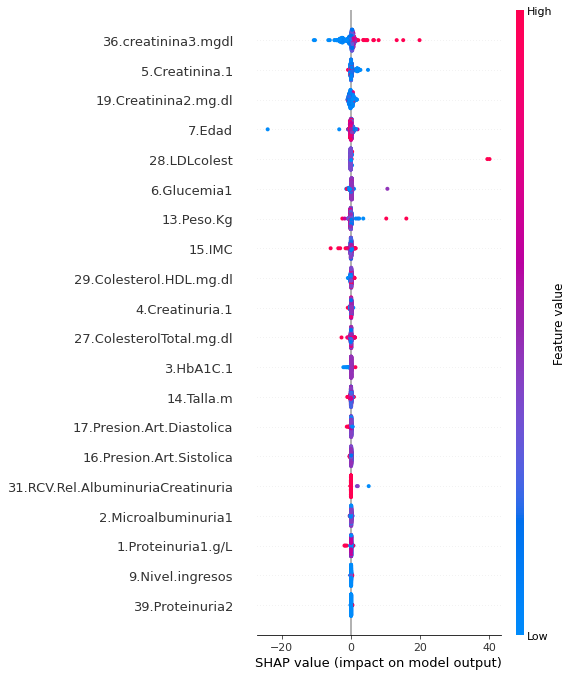

In [41]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# XGBoost model that doesn't need imputations

In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
df = pd.get_dummies(df)
X, y = df.drop(columns=['tfgC_per_month_next']),df['tfgC_per_month_next']
feature_list=list(X.columns)

data_dmatrix = xgb.DMatrix(data=X,label=y,enable_categorical=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#### Profiling the split of the dataset
#from pandas_profiling import ProfileReport
#import pandas as pd
#import matplotlib.pyplot as plt

#Pdf=X_train.copy()
#Pdf['Falla_renal']=y_train
#profile = ProfileReport(Pdf, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTrain70REG.html")
                
#PdfTest = X_test.copy()
#PdfTest['Falla_renal'] = y_test
#profile = ProfileReport(PdfTest, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTest30REG.html")

Pdf=X_train.copy()
Pdf['tfgC_per_month_next']=y_train
#profile = ProfileReport(Pdf, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTrain70.html")
                
PdfTest = X_test.copy()
PdfTest['tfgC_per_month_next'] = y_test
#profile = ProfileReport(PdfTest, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTest30.html")


#with pd.ExcelWriter('BasedatosReg.xlsx') as writer:  
#   Pdf.to_excel(writer, sheet_name='70%')
#    PdfTest.to_excel(writer, sheet_name='30%')

In [44]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
             missing=np.nan, monotone_constraints='()', n_estimators=140, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0)

In [45]:
# Tunning max_depth and min_child weight

from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=140, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0, ...)

In [46]:
# Tunning gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_
gsearch3.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=140, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0, ...)

In [47]:
# tunning subsample and colsample
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_
gsearch5.best_estimator_.subsample,gsearch5.best_estimator_.colsample_bytree

(0.85, 0.85)

In [48]:
# tunning reg alpha
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.cv_results_
gsearch6.best_estimator_.reg_alpha


100

In [49]:
# reducing learning rate and incrementing trees for final model

xg_reg= xgb.XGBRegressor( learning_rate = 0.05, n_estimators=4000, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27,reg_alpha = 1e-05)

In [50]:
from sklearn.metrics import r2_score

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

errors = abs(preds - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 4), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(y_test, preds), 3), '%.')

rmse = np.sqrt(mean_squared_error(y_test, preds))

NRMSE=rmse/(y_test.max()-y_test.min())

print('RMSE: ',round(rmse,4),'NRMSE: ',round(NRMSE,4))

print ('R2 test: ',r2_score(y_test, preds))

print ('R2 train: ',r2_score(y_train, xg_reg.predict(X_train)))

Mean Absolute Error: 4.1108 calculated tfg change/month
sMAPE: 144.947 %.
RMSE:  9.542 NRMSE:  0.0384
R2 test:  -0.12830818498285423
R2 train:  0.9885471795245684


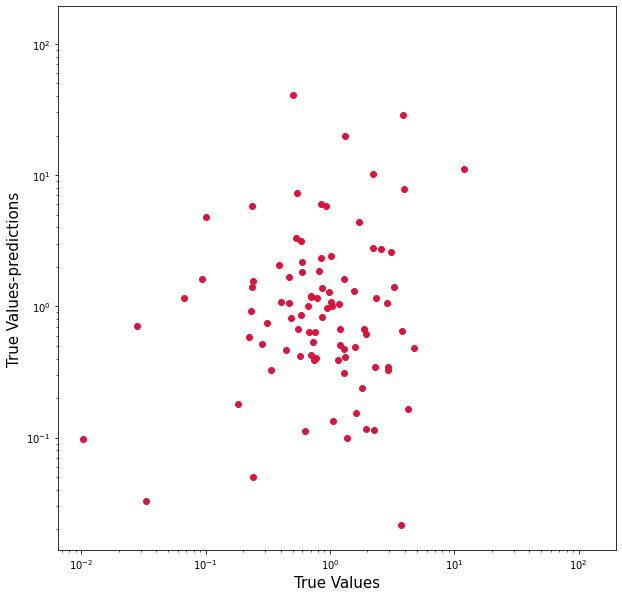

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds-y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)

plt.show()

[12:51:38] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


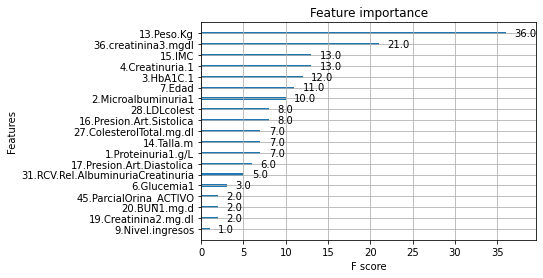

In [52]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

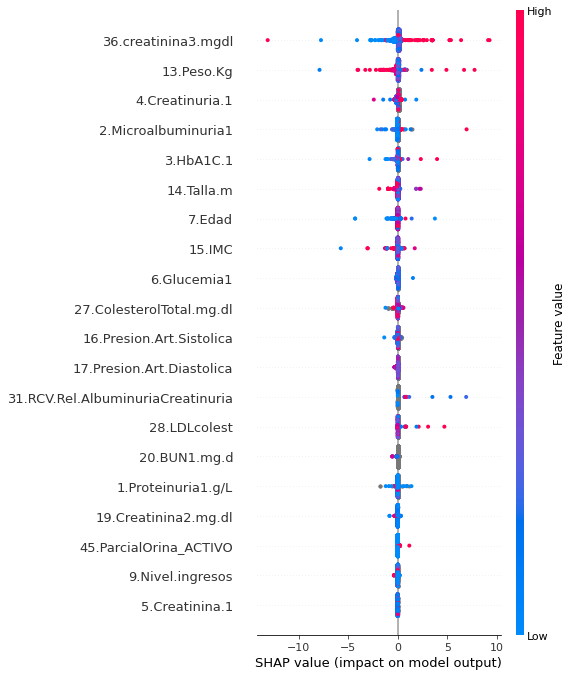

In [53]:
import shap
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(data_dmatrix)
shap.summary_plot(shap_values, X)

# Validation scores

In [ ]:
XV, yV = validation_features.drop(columns=['tfgC_per_month_next']),validation_features['tfgC_per_month_next']
preds = xg_reg.predict(XV)

errors = abs(preds - yV)

print('Mean Absolute Error XGboost:', round(np.mean(errors), 4), 'tfgC_per_month_next')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:XGboost', round(smape(yV, preds), 3), '%.')

rmse = np.sqrt(mean_squared_error(yV, preds))

NRMSE=rmse/(yV.max()-yV.min())

print('RMSE:XGboost ',round(rmse,4),'NRMSE:XGboost ',round(NRMSE,4))

print ('R2 XGboost: ',r2_score(yV, preds))

### Random forest
Validation_features_imp = imp.transform(XV)

predsRF = rf.predict(Validation_features_imp)

errorsRF = abs(predsRF - yV)

print('Mean Absolute Error RF:', round(np.mean(errors), 4), 'calculated tfg')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:RF', round(smape(yV, predsRF), 3), '%.')

rmse = np.sqrt(mean_squared_error(yV, predsRF))

NRMSE=rmse/(yV.max()-yV.min())

print('RMSE:RF ',round(rmse,4),'NRMSE:RF ',round(NRMSE,4))

print ('R2 RF: ',r2_score(yV, predsRF))



# Log transforming the Dy the data before and then rf

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
Non_Categorical_variables = [ '1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']
    
Categorical_variablesK=['7.Edad', '9.Nivel.ingresos']

ldf=ndf[Non_Categorical_variables]

numeric_df = ldf.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df[Categorical_variablesK[0]]=ndf[Categorical_variablesK[0]]
numeric_df[Categorical_variablesK[1]]=ndf[Categorical_variablesK[1]]

df=numeric_df[:]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_next'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_next', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);

divide by zero encountered in log
invalid value encountered in log


Training Features Shape: (749, 33)
Training Labels Shape: (749,)
Testing Features Shape: (250, 33)
Testing Labels Shape: (250,)


In [55]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))



Mean Absolute Error: 0.95 calculated tfg change/month
sMAPE: 130.02 %.
RMSE:  1.23 NRMSE:  0.17
R2 test:  0.04474921769600004
R2 train:  0.8822108239023325


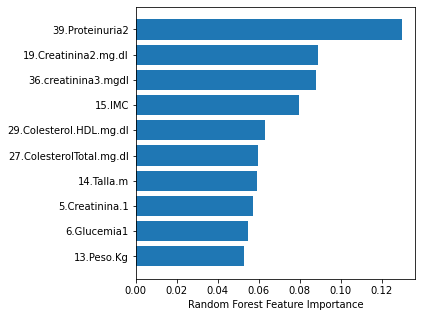

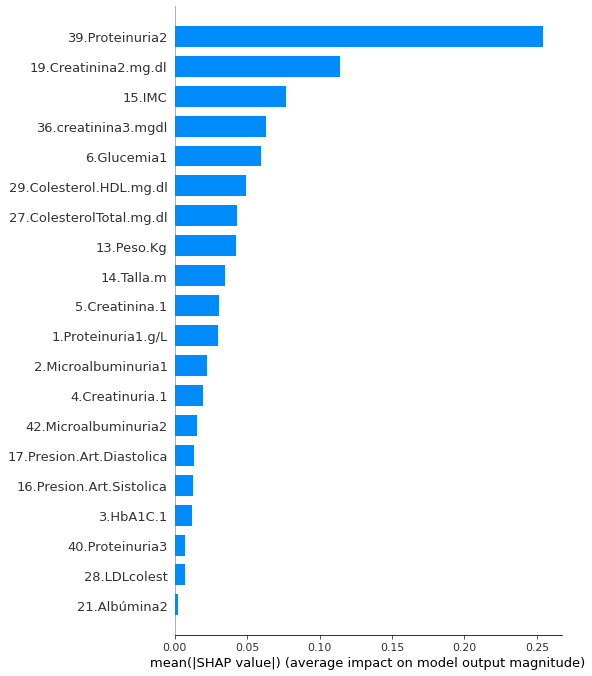

In [56]:
# Feature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

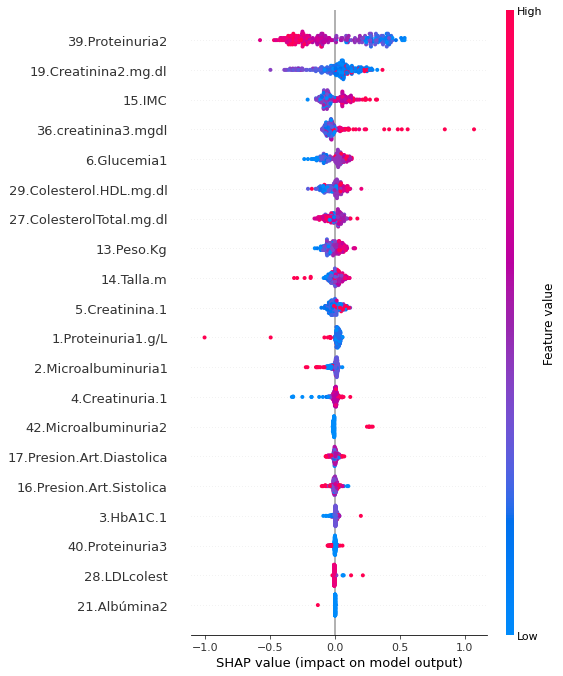

In [57]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# Cross validation

In [60]:
from sklearn.model_selection import cross_validate
xg_reg= xgb.XGBRegressor( learning_rate = 0.1, n_estimators=2000, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27,reg_alpha = 1e-05)
# Perform cross-validation: scores
scores = cross_validate(xg_reg, X_train, y_train,n_jobs=5, cv=5,scoring=('r2', 'neg_root_mean_squared_error','explained_variance'),return_train_score=True)
# Print cv_results
scores

{'fit_time': array([58.08093238, 58.12504935, 58.02358747, 57.04470897, 56.4595027 ]),
 'score_time': array([0.01043653, 0.00911522, 0.04686499, 0.052953  , 0.08327746]),
 'test_r2': array([-0.64476052, -0.43490843, -0.30760434, -3.5712257 , -0.68084308]),
 'train_r2': array([0.99417455, 0.99487291, 0.99339769, 0.99270306, 0.99378105]),
 'test_neg_root_mean_squared_error': array([ -8.31375992, -11.05981574, -16.88819848,  -9.26496636,
         -5.46628016]),
 'train_neg_root_mean_squared_error': array([-0.70477246, -0.61739161, -0.52071143, -0.81483217, -0.75344601]),
 'test_explained_variance': array([-0.64368534, -0.42222685, -0.29932016, -3.57100453, -0.67600335]),
 'train_explained_variance': array([0.99417455, 0.99487292, 0.99339769, 0.99270306, 0.99378112])}

# new visualizations